In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm


# 1. Load GDP Data into a new Data Frame

In [2]:
df_gdp = pd.read_csv("../data/GDP Data.csv")
df_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.390503e+09,2.549721e+09,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,...,1.585657e+10,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.948438e+10,1.910135e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.379950e+10,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,9.463542e+10
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.192693e+10,1.289077e+10,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527808e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09


In [3]:
df_gdp.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
Length: 64, dtype: object

# 2. Rename columns names

In [4]:
df_gdp= df_gdp.rename({'Country Name' : 'Country',
               '2017' : 'gdp_2017'},axis=1)

In [5]:
df_gdp.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,gdp_2017,2018,2019
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.390503e+09,2.549721e+09,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,...,1.585657e+10,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.948438e+10,1.910135e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.379950e+10,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,9.463542e+10
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.192693e+10,1.289077e+10,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527808e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09


# 3. Drop the NaN values

In [6]:
df_gdp_new = df_gdp[['Country', 'gdp_2017']].copy()
df_gdp_new.dropna(inplace=True)
df_gdp_new.head()


,Country,gdp_2017
0,Aruba,3.056425e+09
1,Afghanistan,2.019176e+10
2,Angola,1.221240e+11
3,Albania,1.301969e+10
4,Andorra,3.000181e+09


# 4. Sort values by gdp_2017
* the values are represented in scientific notation, make sure to pay attention to the power of e

In [7]:
df_gdp_new.sort_values(by=['gdp_2017'])


,Country,gdp_2017
243,Tuvalu,4.061925e+07
177,Nauru,1.095859e+08
122,Kiribati,1.872762e+08
153,Marshall Islands,2.128810e+08
186,Palau,2.863218e+08
...,...,...
101,IDA & IBRD total,3.094160e+13
196,Post-demographic dividend,4.741500e+13
179,OECD members,5.025760e+13
93,High income,5.141610e+13


# 5. Load Slavery Index Data into a new Data Frame

In [8]:
df_slavery = pd.read_csv("../data/clean_slavery_index.csv", header=1)
df_slavery

,Country,"Population \n(from United Nations Population Division, World Population Prospects)",Region,"Est. prevalence of population in modern slavery (victims per 1,000 population)",Est. number of people in modern slavery,Factor One Governance Issues,Factor Two Nourishment and Access,Factor Three Inequality,Factor Four Disenfranchised Groups,Factor Five Effects of Conflict,...,NEG Government complicity (1.4.3),NEG State-imposed forced labour (1.8.1),Address risk,%.3,Supply chains,%.4,SUM/104,SUM Neg,TOTAL,Credit rating
0,"Korea, Democratic People's Republic of","25,244,000",Asia and the Pacific,104.6,"2,640,000",87.6,52.0,30.3,32.4,12.3,...,-1.0,-1.0,0.3,4.8,0.0,0.0,0.4,-2.0,-5.6,D
1,Eritrea,"4,847,000",Africa,93.0,"451,000",71.0,50.6,33.7,48.1,25.9,...,-1.0,-1.0,1.5,21.4,0.0,0.0,1.4,-2.0,-2.0,D
2,Burundi,"10,199,000",Africa,40.0,"408,000",72.4,42.6,42.1,48.1,41.7,...,-1.0,-1.0,1.8,26.2,0.0,0.0,5.0,-2.0,10.7,C
3,Central African Republic,"4,546,000",Africa,22.3,"101,000",85.4,50.2,62.7,58.0,81.6,...,-1.0,0.0,1.5,21.4,0.0,0.0,1.7,-1.0,2.5,D
4,Afghanistan,"33,736,000",Asia and the Pacific,22.2,"749,000",81.0,41.3,64.7,46.0,92.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Malta,"428,000",Europe and Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,Tuvalu,NaN,Asia and the Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,Saint Vincent and the Grenadines,"109,000",Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,Vanuatu,"265,000",Asia and the Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_slavery.columns = df_slavery.columns.str.strip()
df_slavery.columns

Index(['Country',
       'Population \n(from United Nations Population Division, World Population Prospects)',
       'Region',
       'Est. prevalence of population in modern slavery (victims per 1,000 population)',
       'Est. number of people in modern slavery',
       'Factor One Governance Issues', 'Factor Two Nourishment and Access',
       'Factor Three Inequality', 'Factor Four Disenfranchised Groups',
       'Factor Five Effects of Conflict',
       'Final overall (normalised, weighted) vulnerability score',
       'Support survivors', '%', 'Criminal justice', '%.1', 'Coordination',
       '%.2', 'NEG Government  complicity (1.4.3)',
       'NEG State-imposed forced labour (1.8.1)', 'Address risk', '%.3',
       'Supply chains', '%.4', 'SUM/104', 'SUM Neg', 'TOTAL', 'Credit rating'],
      dtype='object')

# 5. Merge Table with the Slavery Index Data

In [10]:
reunion = pd.merge(df_slavery, df_gdp_new, on="Country" )
reunion

,Country,"Population \n(from United Nations Population Division, World Population Prospects)",Region,"Est. prevalence of population in modern slavery (victims per 1,000 population)",Est. number of people in modern slavery,Factor One Governance Issues,Factor Two Nourishment and Access,Factor Three Inequality,Factor Four Disenfranchised Groups,Factor Five Effects of Conflict,...,NEG State-imposed forced labour (1.8.1),Address risk,%.3,Supply chains,%.4,SUM/104,SUM Neg,TOTAL,Credit rating,gdp_2017
0,Burundi,"10,199,000",Africa,40.0,"408,000",72.4,42.6,42.1,48.1,41.7,...,-1.0,1.8,26.2,0.0,0.0,5.0,-2.0,10.7,C,3.172292e+09
1,Central African Republic,"4,546,000",Africa,22.3,"101,000",85.4,50.2,62.7,58.0,81.6,...,0.0,1.5,21.4,0.0,0.0,1.7,-1.0,2.5,D,2.072350e+09
2,Afghanistan,"33,736,000",Asia and the Pacific,22.2,"749,000",81.0,41.3,64.7,46.0,92.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.019176e+10
3,Mauritania,"4,182,000",Africa,21.4,"90,000",67.3,33.7,39.3,50.5,22.3,...,0.0,2.5,35.7,0.0,0.0,5.3,-1.0,15.5,C,6.758391e+09
4,Pakistan,"189,381,000",Asia and the Pacific,16.8,"3,186,000",56.8,36.2,45.9,55.3,92.8,...,0.0,2.8,40.5,0.0,0.0,6.2,-1.0,18.6,C,3.045670e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Tonga,"106,000",Asia and the Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.301742e+08
152,Malta,"428,000",Europe and Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.274786e+10
153,Tuvalu,NaN,Asia and the Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.061925e+07
154,Vanuatu,"265,000",Asia and the Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.800436e+08


In [11]:
reunion.rename(columns={"Population \n(from United Nations Population Division, World Population Prospects)": "total_population"}, inplace=True)
reunion

,Country,total_population,Region,"Est. prevalence of population in modern slavery (victims per 1,000 population)",Est. number of people in modern slavery,Factor One Governance Issues,Factor Two Nourishment and Access,Factor Three Inequality,Factor Four Disenfranchised Groups,Factor Five Effects of Conflict,...,NEG State-imposed forced labour (1.8.1),Address risk,%.3,Supply chains,%.4,SUM/104,SUM Neg,TOTAL,Credit rating,gdp_2017
0,Burundi,"10,199,000",Africa,40.0,"408,000",72.4,42.6,42.1,48.1,41.7,...,-1.0,1.8,26.2,0.0,0.0,5.0,-2.0,10.7,C,3.172292e+09
1,Central African Republic,"4,546,000",Africa,22.3,"101,000",85.4,50.2,62.7,58.0,81.6,...,0.0,1.5,21.4,0.0,0.0,1.7,-1.0,2.5,D,2.072350e+09
2,Afghanistan,"33,736,000",Asia and the Pacific,22.2,"749,000",81.0,41.3,64.7,46.0,92.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.019176e+10
3,Mauritania,"4,182,000",Africa,21.4,"90,000",67.3,33.7,39.3,50.5,22.3,...,0.0,2.5,35.7,0.0,0.0,5.3,-1.0,15.5,C,6.758391e+09
4,Pakistan,"189,381,000",Asia and the Pacific,16.8,"3,186,000",56.8,36.2,45.9,55.3,92.8,...,0.0,2.8,40.5,0.0,0.0,6.2,-1.0,18.6,C,3.045670e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Tonga,"106,000",Asia and the Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.301742e+08
152,Malta,"428,000",Europe and Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.274786e+10
153,Tuvalu,NaN,Asia and the Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.061925e+07
154,Vanuatu,"265,000",Asia and the Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.800436e+08


In [12]:
reunion.dropna(inplace=True)
reunion

,Country,total_population,Region,"Est. prevalence of population in modern slavery (victims per 1,000 population)",Est. number of people in modern slavery,Factor One Governance Issues,Factor Two Nourishment and Access,Factor Three Inequality,Factor Four Disenfranchised Groups,Factor Five Effects of Conflict,...,NEG State-imposed forced labour (1.8.1),Address risk,%.3,Supply chains,%.4,SUM/104,SUM Neg,TOTAL,Credit rating,gdp_2017
0,Burundi,"10,199,000",Africa,40.0,"408,000",72.4,42.6,42.1,48.1,41.7,...,-1.0,1.8,26.2,0.0,0.0,5.0,-2.0,10.7,C,3.172292e+09
1,Central African Republic,"4,546,000",Africa,22.3,"101,000",85.4,50.2,62.7,58.0,81.6,...,0.0,1.5,21.4,0.0,0.0,1.7,-1.0,2.5,D,2.072350e+09
3,Mauritania,"4,182,000",Africa,21.4,"90,000",67.3,33.7,39.3,50.5,22.3,...,0.0,2.5,35.7,0.0,0.0,5.3,-1.0,15.5,C,6.758391e+09
4,Pakistan,"189,381,000",Asia and the Pacific,16.8,"3,186,000",56.8,36.2,45.9,55.3,92.8,...,0.0,2.8,40.5,0.0,0.0,6.2,-1.0,18.6,C,3.045670e+11
5,Cambodia,"15,518,000",Asia and the Pacific,16.8,"261,000",66.3,38.5,41.6,56.7,14.8,...,0.0,2.3,33.3,0.0,0.0,10.5,0.0,37.6,CCC,2.217720e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Chile,"17,763,000",Americas,0.8,"14,000",28.5,13.8,50.0,23.5,20.3,...,0.0,5.3,76.2,0.0,0.0,17.5,0.0,62.3,BBB,2.770450e+11
137,Australia,"23,800,000",Asia and the Pacific,0.6,"15,000",11.9,15.7,20.7,12.0,13.0,...,0.0,4.8,69.0,0.0,0.0,17.9,0.0,63.8,BBB,1.330140e+12
138,New Zealand,"4,615,000",Asia and the Pacific,0.6,"3,000",12.2,18.4,16.2,7.0,7.0,...,0.0,6.7,95.2,0.0,0.0,16.1,0.0,57.6,BB,2.054160e+11
139,Canada,"35,950,000",Americas,0.5,"17,000",16.6,20.7,20.1,9.2,21.5,...,0.0,4.3,61.9,0.0,0.0,16.4,0.0,58.6,BB,1.649880e+12


In [13]:
reunion['total_population'] = reunion['total_population'].astype('str') 
reunion['total_population'] = reunion['total_population'].str.replace(",", "")
reunion = reunion.astype({"total_population" :float})
reunion.dtypes

Country                                                                            object
total_population                                                                  float64
Region                                                                             object
Est. prevalence of population in modern slavery (victims per 1,000 population)    float64
Est. number of people in modern slavery                                            object
Factor One Governance Issues                                                      float64
Factor Two Nourishment and Access                                                 float64
Factor Three Inequality                                                           float64
Factor Four Disenfranchised Groups                                                float64
Factor Five Effects of Conflict                                                   float64
Final overall (normalised, weighted) vulnerability score                          float64
Support su

In [14]:
reunion['gdp_per_capita'] = reunion.apply(lambda row: row.gdp_2017 / row.total_population, axis=1)
reunion.gdp_per_capita = reunion.gdp_per_capita.round()
reunion

,Country,total_population,Region,"Est. prevalence of population in modern slavery (victims per 1,000 population)",Est. number of people in modern slavery,Factor One Governance Issues,Factor Two Nourishment and Access,Factor Three Inequality,Factor Four Disenfranchised Groups,Factor Five Effects of Conflict,...,Address risk,%.3,Supply chains,%.4,SUM/104,SUM Neg,TOTAL,Credit rating,gdp_2017,gdp_per_capita
0,Burundi,10199000.0,Africa,40.0,"408,000",72.4,42.6,42.1,48.1,41.7,...,1.8,26.2,0.0,0.0,5.0,-2.0,10.7,C,3.172292e+09,311.0
1,Central African Republic,4546000.0,Africa,22.3,"101,000",85.4,50.2,62.7,58.0,81.6,...,1.5,21.4,0.0,0.0,1.7,-1.0,2.5,D,2.072350e+09,456.0
3,Mauritania,4182000.0,Africa,21.4,"90,000",67.3,33.7,39.3,50.5,22.3,...,2.5,35.7,0.0,0.0,5.3,-1.0,15.5,C,6.758391e+09,1616.0
4,Pakistan,189381000.0,Asia and the Pacific,16.8,"3,186,000",56.8,36.2,45.9,55.3,92.8,...,2.8,40.5,0.0,0.0,6.2,-1.0,18.6,C,3.045670e+11,1608.0
5,Cambodia,15518000.0,Asia and the Pacific,16.8,"261,000",66.3,38.5,41.6,56.7,14.8,...,2.3,33.3,0.0,0.0,10.5,0.0,37.6,CCC,2.217720e+10,1429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Chile,17763000.0,Americas,0.8,"14,000",28.5,13.8,50.0,23.5,20.3,...,5.3,76.2,0.0,0.0,17.5,0.0,62.3,BBB,2.770450e+11,15597.0
137,Australia,23800000.0,Asia and the Pacific,0.6,"15,000",11.9,15.7,20.7,12.0,13.0,...,4.8,69.0,0.0,0.0,17.9,0.0,63.8,BBB,1.330140e+12,55888.0
138,New Zealand,4615000.0,Asia and the Pacific,0.6,"3,000",12.2,18.4,16.2,7.0,7.0,...,6.7,95.2,0.0,0.0,16.1,0.0,57.6,BB,2.054160e+11,44511.0
139,Canada,35950000.0,Americas,0.5,"17,000",16.6,20.7,20.1,9.2,21.5,...,4.3,61.9,0.0,0.0,16.4,0.0,58.6,BB,1.649880e+12,45894.0


# Rename column

In [19]:
reunion.rename(columns={"Est. prevalence of population in modern slavery (victims per 1,000 population)": "victims_per_1000_population"}, inplace=True)
reunion.head()

,Country,total_population,Region,Victims_per_1000_population,Est. number of people in modern slavery,Factor One Governance Issues,Factor Two Nourishment and Access,Factor Three Inequality,Factor Four Disenfranchised Groups,Factor Five Effects of Conflict,...,Address risk,%.3,Supply chains,%.4,SUM/104,SUM Neg,TOTAL,Credit rating,gdp_2017,gdp_per_capita
0,Burundi,10199000.0,Africa,40.0,"408,000",72.4,42.6,42.1,48.1,41.7,...,1.8,26.2,0.0,0.0,5.0,-2.0,10.7,C,3.172292e+09,311.0
1,Central African Republic,4546000.0,Africa,22.3,"101,000",85.4,50.2,62.7,58.0,81.6,...,1.5,21.4,0.0,0.0,1.7,-1.0,2.5,D,2.072350e+09,456.0
3,Mauritania,4182000.0,Africa,21.4,"90,000",67.3,33.7,39.3,50.5,22.3,...,2.5,35.7,0.0,0.0,5.3,-1.0,15.5,C,6.758391e+09,1616.0
4,Pakistan,189381000.0,Asia and the Pacific,16.8,"3,186,000",56.8,36.2,45.9,55.3,92.8,...,2.8,40.5,0.0,0.0,6.2,-1.0,18.6,C,3.045670e+11,1608.0
5,Cambodia,15518000.0,Asia and the Pacific,16.8,"261,000",66.3,38.5,41.6,56.7,14.8,...,2.3,33.3,0.0,0.0,10.5,0.0,37.6,CCC,2.217720e+10,1429.0


# Plotting

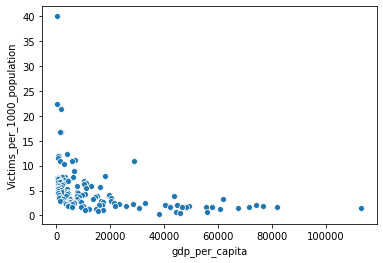

In [21]:
ax = sns.scatterplot(data = reunion,
                x="gdp_per_capita",
                y="Victims_per_1000_population");

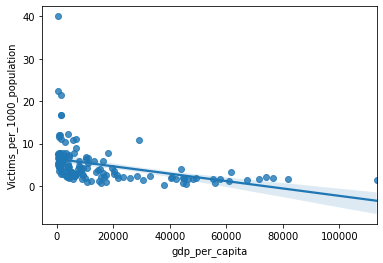

In [24]:
ax= sns.regplot(data = reunion,
                x="gdp_per_capita",
                y="Victims_per_1000_population");

In [25]:
reunion.corr()

,total_population,Victims_per_1000_population,Factor One Governance Issues,Factor Two Nourishment and Access,Factor Three Inequality,Factor Four Disenfranchised Groups,Factor Five Effects of Conflict,"Final overall (normalised, weighted) vulnerability score",Support survivors,%,...,NEG State-imposed forced labour (1.8.1),Address risk,%.3,Supply chains,%.4,SUM/104,SUM Neg,TOTAL,gdp_2017,gdp_per_capita
total_population,1.000000,-0.017584,0.034661,0.008178,-0.065670,-0.018368,0.334817,0.077283,-0.024617,-0.024246,...,-0.204369,-0.024486,-0.027878,0.136807,0.136065,0.012674,-0.147079,-0.009310,0.566135,-0.055574
Victims_per_1000_population,-0.017584,1.000000,0.521355,0.520234,0.210290,0.443543,0.355926,0.587430,-0.419260,-0.418470,...,-0.313733,-0.433439,-0.429783,-0.225352,-0.223516,-0.495304,-0.374461,-0.518656,-0.146913,-0.378734
Factor One Governance Issues,0.034661,0.521355,1.000000,0.562720,0.471258,0.467857,0.415296,0.922364,-0.706053,-0.706679,...,-0.236204,-0.654304,-0.653175,-0.568315,-0.556321,-0.793348,-0.467201,-0.811843,-0.202034,-0.689694
Factor Two Nourishment and Access,0.008178,0.520234,0.562720,1.000000,0.365497,0.417396,0.326050,0.732119,-0.475986,-0.474813,...,-0.050948,-0.512497,-0.507123,-0.388911,-0.379675,-0.551958,-0.297761,-0.563115,-0.156296,-0.514765
Factor Three Inequality,-0.065670,0.210290,0.471258,0.365497,1.000000,0.445508,0.268431,0.621531,-0.275942,-0.277604,...,0.010756,-0.186228,-0.183793,-0.316282,-0.301033,-0.301413,-0.235158,-0.317171,-0.164316,-0.606840
Factor Four Disenfranchised Groups,-0.018368,0.443543,0.467857,0.417396,0.445508,1.000000,0.223660,0.629960,-0.262267,-0.261920,...,-0.006594,-0.296502,-0.293005,-0.275253,-0.284219,-0.340489,-0.123979,-0.337296,-0.220592,-0.633496
Factor Five Effects of Conflict,0.334817,0.355926,0.415296,0.326050,0.268431,0.223660,1.000000,0.588517,-0.236591,-0.236245,...,-0.221974,-0.281717,-0.280085,-0.217287,-0.206706,-0.256779,-0.409693,-0.300173,0.070621,-0.359601
"Final overall (normalised, weighted) vulnerability score",0.077283,0.587430,0.922364,0.732119,0.621531,0.629960,0.588517,1.000000,-0.638467,-0.638670,...,-0.190137,-0.619119,-0.616015,-0.544367,-0.532535,-0.725469,-0.470051,-0.749134,-0.194626,-0.770620
Support survivors,-0.024617,-0.419260,-0.706053,-0.475986,-0.275942,-0.262267,-0.236591,-0.638467,1.000000,0.999875,...,0.161343,0.553307,0.552650,0.411375,0.410467,0.892121,0.326493,0.885453,0.193718,0.426024
%,-0.024246,-0.418470,-0.706679,-0.474813,-0.277604,-0.261920,-0.236245,-0.638670,0.999875,1.000000,...,0.158524,0.554474,0.553869,0.412262,0.411145,0.892567,0.325014,0.885650,0.195107,0.425282


In [44]:
reunion_new = reunion[["Country", "gdp_per_capita", "Victims_per_1000_population"]].copy()
reunion_new

,Country,gdp_per_capita,Victims_per_1000_population
0,Burundi,311.0,40.0
1,Central African Republic,456.0,22.3
3,Mauritania,1616.0,21.4
4,Pakistan,1608.0,16.8
5,Cambodia,1429.0,16.8
...,...,...,...
136,Chile,15597.0,0.8
137,Australia,55888.0,0.6
138,New Zealand,44511.0,0.6
139,Canada,45894.0,0.5


In [29]:
reunion_new.corr()

,gdp_per_capita,Victims_per_1000_population
gdp_per_capita,1.000000,-0.378734
Victims_per_1000_population,-0.378734,1.000000


Text(0, 0.5, 'Frequency')

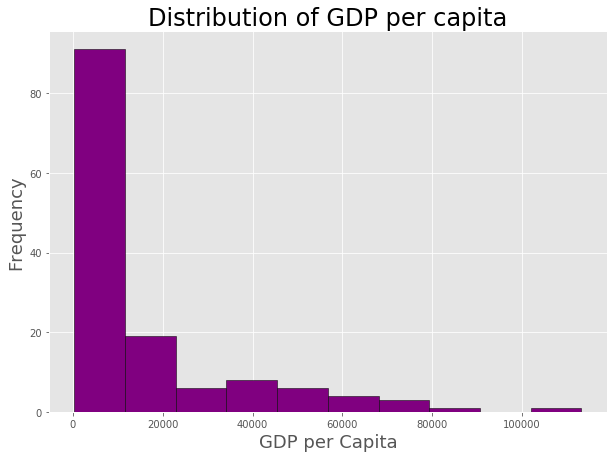

In [34]:
# histogram of the GDP per capita
import matplotlib.pyplot as plt
plt.style.use('ggplot')
reunion_new.gdp_per_capita.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of GDP per capita', size=24)
plt.xlabel('GDP per Capita', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

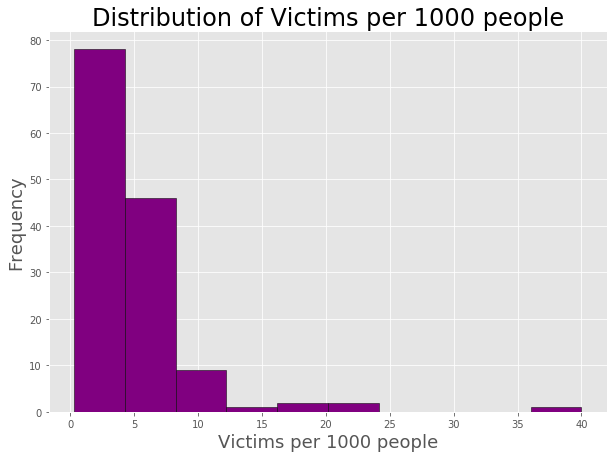

In [35]:
# histogram of victims per 1000 people
import matplotlib.pyplot as plt
plt.style.use('ggplot')
reunion_new.Victims_per_1000_population.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Victims per 1000 people', size=24)
plt.xlabel('Victims per 1000 people', size=18)
plt.ylabel('Frequency', size=18)

In [27]:
x = sm.add_constant(reunion_new.gdp_per_capita)
model = sm.OLS(reunion_new.Victims_per_1000_population,x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     Victims_per_1000_population   R-squared:                       0.143
Model:                                     OLS   Adj. R-squared:                  0.137
Method:                          Least Squares   F-statistic:                     22.94
Date:                         Thu, 09 Jul 2020   Prob (F-statistic):           4.28e-06
Time:                                 14:57:26   Log-Likelihood:                -404.09
No. Observations:                          139   AIC:                             812.2
Df Residuals:                              137   BIC:                             818.0
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [55]:
reunion_new = reunion_new.assign(gdp_per_capita2=reunion_new["gdp_per_capita"] ** 2)

In [56]:
x_q = sm.add_constant(reunion_new[["gdp_per_capita", "gdp_per_capita2"]])
model_q = sm.OLS(reunion_new["Victims_per_1000_population"],x_q)
results_q = model_q.fit()
print(results_q.summary())

                                 OLS Regression Results                                
Dep. Variable:     Victims_per_1000_population   R-squared:                       0.195
Model:                                     OLS   Adj. R-squared:                  0.183
Method:                          Least Squares   F-statistic:                     16.46
Date:                         Thu, 09 Jul 2020   Prob (F-statistic):           3.96e-07
Time:                                 17:49:32   Log-Likelihood:                -399.78
No. Observations:                          139   AIC:                             805.6
Df Residuals:                              136   BIC:                             814.4
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [38]:
variable1 = np.polyfit(reunion_new.gdp_per_capita, reunion_new.Victims_per_1000_population, 1)



array([-8.70854756e-05,  6.38889089e+00])

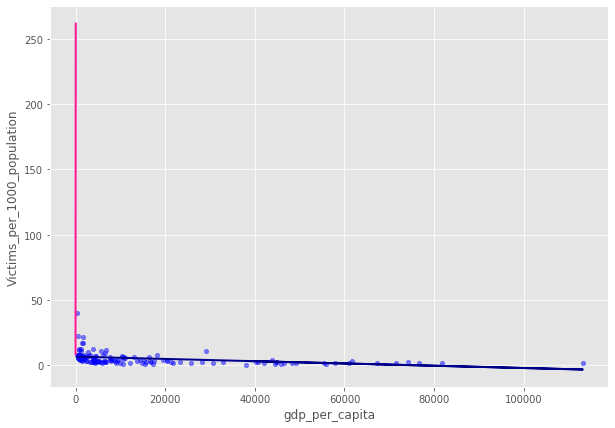

In [40]:
ax1 = reunion_new.plot(kind='scatter', x='gdp_per_capita', y='Victims_per_1000_population', color='blue', alpha=0.5, figsize=(10, 7))
#reunion_new.plot(kind='scatter', x='gdp_per_capita', y='Victims_per_1000_population', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)

# regression lines
plt.plot(reunion_new.gdp_per_capita, variable1[0] * reunion_new.gdp_per_capita + variable1[1], color='darkblue', linewidth=2)
plt.plot(reunion_new.Victims_per_1000_population, variable1[1] * reunion_new.Victims_per_1000_population + variable1[1], color='deeppink', linewidth=2)


In [41]:
education = pd.read_csv("..//data/Education_index.csv",sep=';')#, dtype={"2013": float})


In [42]:
education_df = education[["HDI Rank","Country","2013"]].copy()
education_df = education_df.replace("..", np.nan)
education_df.dropna(inplace=True)

education_df["2013"] = education_df["2013"].str.replace(',','.')
education_df = education_df.astype({"HDI Rank":float, "2013" :float})
education_df.rename(columns={"HDI Rank": "HDI_Rank","2013": "Education_Access_Score"}, inplace=True)

education_df, education_df.dtypes

(     HDI_Rank                             Country  Education_Access_Score
 0       169.0                         Afghanistan                0.365333
 1        95.0                             Albania                0.608519
 2        93.0                             Algeria                0.642589
 3        37.0                             Andorra                0.670287
 4       149.0                              Angola                0.474212
 ..        ...                                 ...                     ...
 190      67.0  Venezuela (Bolivarian Republic of)                0.682483
 191     121.0                             Vietnam                0.513489
 192     154.0                               Yemen                0.339222
 193     141.0                              Zambia                0.591333
 194     156.0                            Zimbabwe                0.499933
 
 [187 rows x 3 columns],
 HDI_Rank                  float64
 Country                    object
 Ed

# 2nd Merge on the Slavery Index for the HDI_Rank and Education_Access_Score

In [45]:
reunion2 = pd.merge(reunion_new, education_df, on="Country" )
reunion2

,Country,gdp_per_capita,Victims_per_1000_population,HDI_Rank,Education_Access_Score
0,Burundi,311.0,40.0,180.0,0.370089
1,Central African Republic,456.0,22.3,185.0,0.317867
2,Mauritania,1616.0,21.4,161.0,0.352278
3,Pakistan,1608.0,16.8,146.0,0.371667
4,Cambodia,1429.0,16.8,136.0,0.495178
...,...,...,...,...,...
133,Chile,15597.0,0.8,41.0,0.745675
134,Australia,55888.0,0.6,2.0,0.926536
135,New Zealand,44511.0,0.6,7.0,0.916767
136,Canada,45894.0,0.5,8.0,0.850300


In [59]:
reunion2 = reunion2.assign(gdp_per_capita2 = reunion2["gdp_per_capita"] ** 2)
reunion2

,Country,gdp_per_capita,Victims_per_1000_population,HDI_Rank,Education_Access_Score,gdp_per_capita2
0,Burundi,311.0,40.0,180.0,0.370089,9.672100e+04
1,Central African Republic,456.0,22.3,185.0,0.317867,2.079360e+05
2,Mauritania,1616.0,21.4,161.0,0.352278,2.611456e+06
3,Pakistan,1608.0,16.8,146.0,0.371667,2.585664e+06
4,Cambodia,1429.0,16.8,136.0,0.495178,2.042041e+06
...,...,...,...,...,...,...
133,Chile,15597.0,0.8,41.0,0.745675,2.432664e+08
134,Australia,55888.0,0.6,2.0,0.926536,3.123469e+09
135,New Zealand,44511.0,0.6,7.0,0.916767,1.981229e+09
136,Canada,45894.0,0.5,8.0,0.850300,2.106259e+09


In [60]:
from sklearn.linear_model import LinearRegression

# create linear regression object
mlr = LinearRegression()

# fit linear regression
mlr.fit(reunion2[['gdp_per_capita', 'Education_Access_Score', "gdp_per_capita2"]], reunion2['Victims_per_1000_population'])

# get the slope and intercept of the line best fit.
print(mlr.intercept_)
# -244.92350252069903

print(mlr.coef_)
# [ 5.97694123 19.37771052]

11.918776185021557
[-8.23144803e-05 -9.58882127e+00  6.48014459e-10]


In [61]:
def run_regression(df, y_col, X_cols):
    y = df[y_col]
    X = df[X_cols]
    X = sm.add_constant(X)
    l = sm.OLS(y, X)
    return l.fit()

In [64]:
run_regression(reunion2, 'Victims_per_1000_population', ['gdp_per_capita', 'Education_Access_Score', "gdp_per_capita2"]).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Victims_per_1000_population   R-squared:                       0.250
Model:                                     OLS   Adj. R-squared:                  0.233
Method:                          Least Squares   F-statistic:                     14.87
Date:                         Thu, 09 Jul 2020   Prob (F-statistic):           2.06e-08
Time:                                 18:02:26   Log-Likelihood:                -392.51
No. Observations:                          138   AIC:                             793.0
Df Residuals:                              134   BIC:                             804.7
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     11.9188      1.608      7.414      0.000       8.739      15.098
gdp_per_capita         -8.231e-05   6.36e-05     -1.294      0.198      -0.000    4.35e-05
Education_Access_Score    -9.5888      3.106     -3.087      0.002     -15.732      -3.445
gdp_per_capita2          6.48e-10   6.96e-10      0.931      0.354   -7.29e-10    2.02e-09
==============================================================================
Omnibus:                      148.365   Durbin-Watson:                   0.539
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3543.019
Skew:                           3.834   Prob(JB):                         0.00
Kurtosis:                      26.609   Cond. No.                     1.71e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""